In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.




Outlier Detection Summary:
Z-score outliers detected: 5
IQR outliers detected: 11
Combined outliers detected: 11


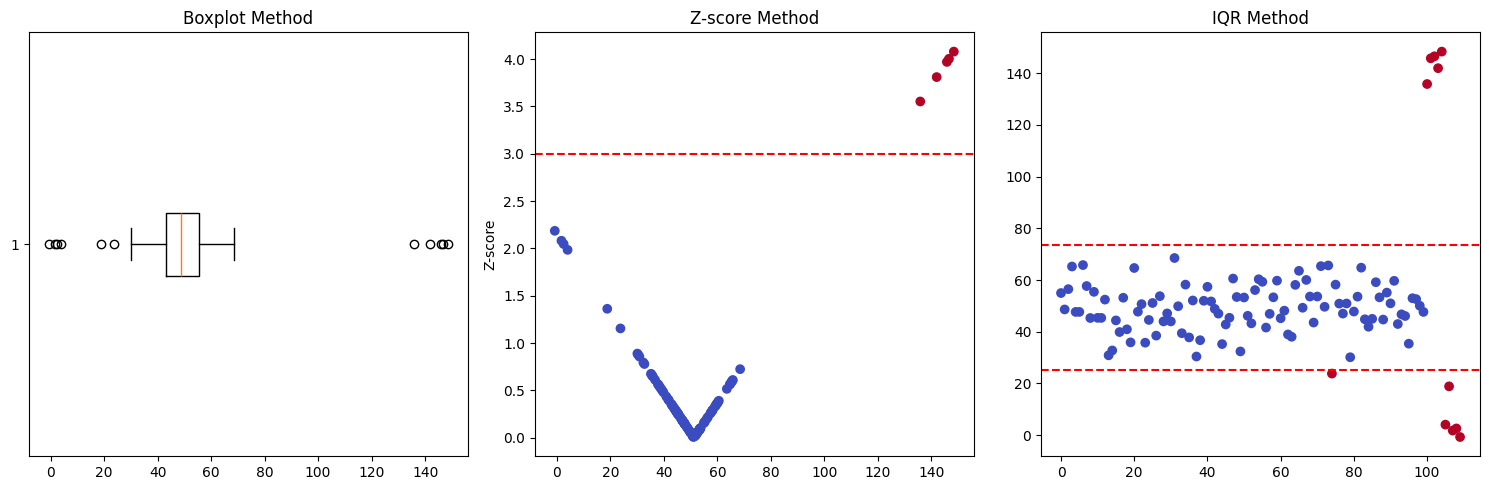


Detected Outliers:
          value
74    23.802549
100  135.846293
101  145.793547
102  146.572855
103  141.977227
104  148.387143
105    4.040509
106   18.861859
107    1.745778
108    2.575504
109   -0.744459


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
def detect_outliers(df, column, z_threshold=3, iqr_factor=1.5):
    z_scores = np.abs(stats.zscore(df[column]))
    z_outliers = z_scores > z_threshold
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr_factor * iqr)
    upper_bound = q3 + (iqr_factor * iqr)
    iqr_outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    combined_outliers = z_outliers | iqr_outliers
    return {
        'z_score': z_outliers,
        'iqr': iqr_outliers,
        'combined': combined_outliers,
        'bounds': {
            'z_score': (df[column].mean() - z_threshold*df[column].std(), 
                       df[column].mean() + z_threshold*df[column].std()),
            'iqr': (lower_bound, upper_bound)
        }
    }
def visualize_outliers(df, column, detection_results):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.boxplot(df[column], vert=False)
    plt.title('Boxplot Method')
    plt.subplot(1, 3, 2)
    z_scores = np.abs(stats.zscore(df[column]))
    plt.scatter(df[column], z_scores, c=detection_results['z_score'], cmap='coolwarm')
    plt.axhline(y=3, color='r', linestyle='--')
    plt.title('Z-score Method')
    plt.ylabel('Z-score')
    plt.subplot(1, 3, 3)
    plt.scatter(range(len(df)), df[column], c=detection_results['iqr'], cmap='coolwarm')
    plt.axhline(y=detection_results['bounds']['iqr'][0], color='r', linestyle='--')
    plt.axhline(y=detection_results['bounds']['iqr'][1], color='r', linestyle='--')
    plt.title('IQR Method')
    plt.tight_layout()
    plt.show()
np.random.seed(42)
data = {
    'value': np.concatenate([
        np.random.normal(50, 10, 100),
        np.random.normal(150, 10, 5),
        np.random.normal(0, 10, 5)
    ])
}
df = pd.DataFrame(data)
results = detect_outliers(df, 'value')
print("Outlier Detection Summary:")
print(f"Z-score outliers detected: {sum(results['z_score'])}")
print(f"IQR outliers detected: {sum(results['iqr'])}")
print(f"Combined outliers detected: {sum(results['combined'])}")
visualize_outliers(df, 'value', results)
print("\nDetected Outliers:")
print(df[results['combined']])